# Movie Recommendation System

This project demonstrates a basic **content-based filtering** recommendation system using movie metadata. It recommends similar movies based on user input using features like genres, keywords, cast, and crew.

# Project-Data Analysis IMDB Movie Dataset

### IMDB data from 2006 to 2016

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
df=pd.read_csv('IMDB-Movie-Data.csv')

In [6]:
df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


# 1. Display Top 10 Rows of The Dataset

In [7]:
df.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


# 2. Check Last 10 Rows of The Dataset

In [8]:
df.tail(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
990,991,Underworld: Rise of the Lycans,"Action,Adventure,Fantasy",An origins story centered on the centuries-old...,Patrick Tatopoulos,"Rhona Mitra, Michael Sheen, Bill Nighy, Steven...",2009,92,6.6,129708,45.80,44.0
991,992,Taare Zameen Par,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0
992,993,Take Me Home Tonight,"Comedy,Drama,Romance","Four years after graduation, an awkward high s...",Michael Dowse,"Topher Grace, Anna Faris, Dan Fogler, Teresa P...",2011,97,6.3,45419,6.92,NaN
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


# 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [10]:
df.shape

(1000, 12)

In [13]:
print('Number of Rows',df.shape[0])
print('Number of Columns',df.shape[1])

Number of Rows 1000
Number of Columns 12


# 4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


# 5. Check Null Values In The Dataset

In [14]:
df.isna().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

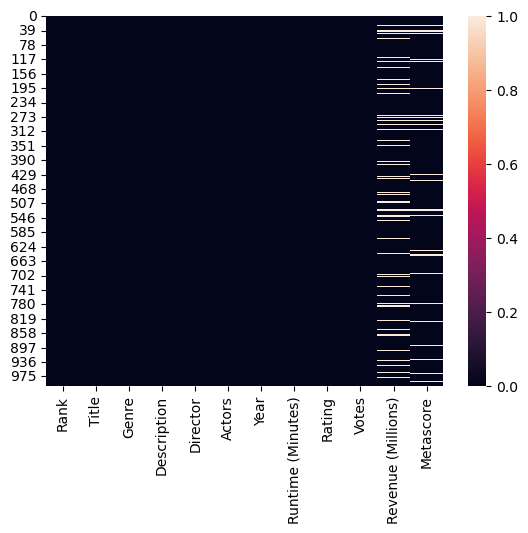

In [16]:
sns.heatmap(df.isnull())
plt.show()

# 6. Drop All The Missing Values

In [17]:
df=df.dropna(axis=0)

In [19]:
df.shape

(838, 12)

In [20]:
df.isna().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

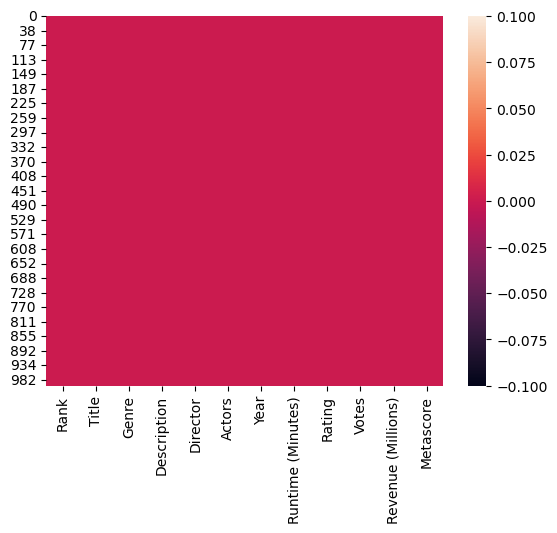

In [22]:
sns.heatmap(df.isnull())
plt.show()

# 7. Check For Duplicate Data

In [25]:
dup_data=df.duplicated().any()
print("Are there any duplicated values in data?",dup_data)

Are there any duplicated values in data? False


In [23]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
993    False
994    False
996    False
997    False
999    False
Length: 838, dtype: bool

# 8. Get Overall Statistics About The DataFrame

In [27]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


# 9. Display Title of The Movie Having Runtime >= 180 Minutes

In [28]:
df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


In [31]:
df[df['Runtime (Minutes)']>=180]['Title']

82     The Wolf of Wall Street
88           The Hateful Eight
311             La vie d'Adèle
Name: Title, dtype: object

# 10. In Which Year There Was The Highest Voting?

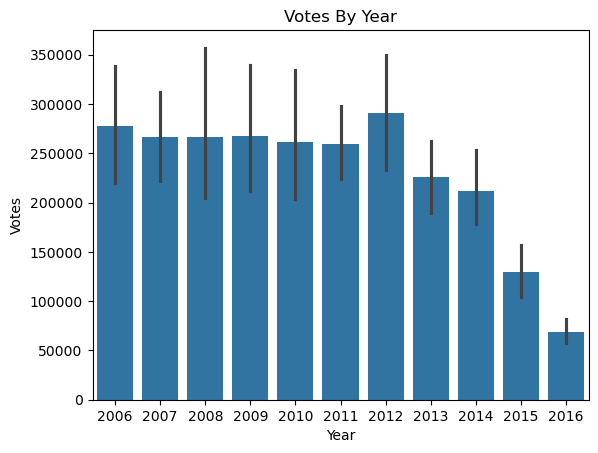

In [34]:
sns.barplot(x='Year',y='Votes',data=df)
plt.title("Votes By Year")
plt.show()

# 11. In Which Year There Was The Highest Revenue?

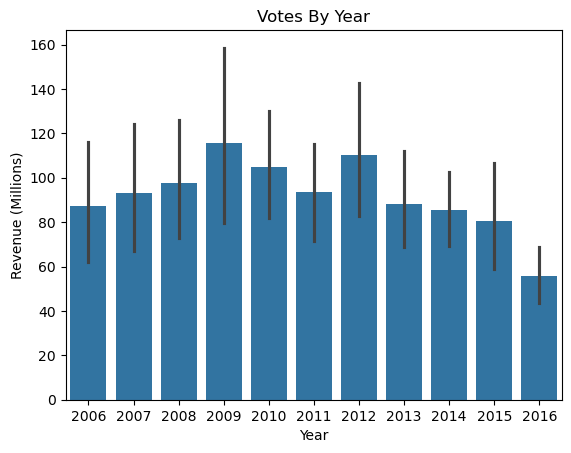

In [35]:
sns.barplot(x='Year',y='Revenue (Millions)',data=df)
plt.title("Votes By Year")
plt.show()

# 12. Find The Average Rating For Each Director

In [40]:
df.groupby('Director')['Rating'].mean().sort_values(ascending=False)

Director
Christopher Nolan                   8.68
Olivier Nakache                     8.60
Makoto Shinkai                      8.60
Florian Henckel von Donnersmarck    8.50
Aamir Khan                          8.50
                                    ... 
Sam Taylor-Johnson                  4.10
Joey Curtis                         4.00
George Nolfi                        3.90
James Wong                          2.70
Jason Friedberg                     1.90
Name: Rating, Length: 524, dtype: float64

# 13. Display Top 10 Lengthy Movies Title

In [53]:
df['title_len']=df['Title'].apply(len)
top_titles = df.sort_values(by='title_len', ascending=False).head(10)
top_titles['Title']

C:\Users\user\AppData\Local\Temp\ipykernel_22452\3351438396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title_len']=df['Title'].apply(len)


259    Norman: The Moderate Rise and Tragic Fall of a...
862    Alexander and the Terrible, Horrible, No Good,...
613    The Assassination of Jesse James by the Coward...
244    Percy Jackson & the Olympians: The Lightning T...
767    Indiana Jones and the Kingdom of the Crystal S...
264     Teenage Mutant Ninja Turtles: Out of the Shadows
260      Birdman or (The Unexpected Virtue of Ignorance)
650       Sweeney Todd: The Demon Barber of Fleet Street
114         Harry Potter and the Deathly Hallows: Part 2
418         Harry Potter and the Deathly Hallows: Part 1
Name: Title, dtype: object

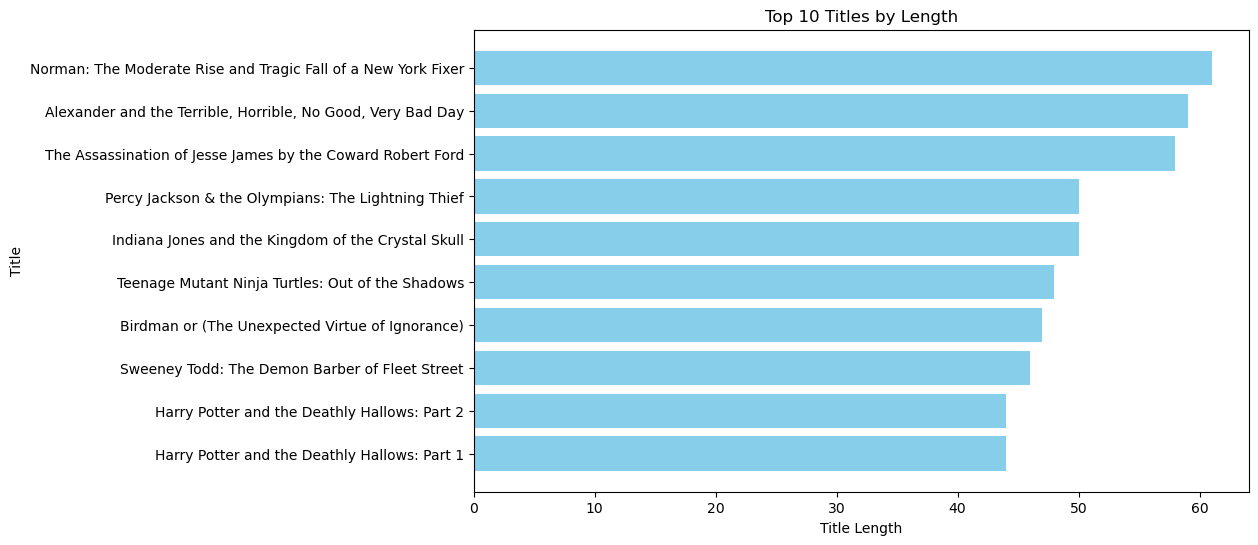

In [54]:
plt.figure(figsize=(10, 6))
plt.barh(top_titles['Title'], top_titles['title_len'], color='skyblue')
plt.xlabel('Title Length')
plt.ylabel('Title')
plt.title('Top 10 Titles by Length')
plt.gca().invert_yaxis()  # Invert the y-axis to have the longest title at the top
plt.show()

# 14. Display Number of Movies Per Year

In [61]:
df['Year'].value_counts()

Year
2016    198
2015    109
2014     93
2013     84
2012     62
2011     57
2010     57
2008     48
2009     45
2007     44
2006     41
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_22452\1298534340.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year',data=df,palette='rainbow')


Text(0.5, 1.0, 'Number of Movies Per Year')

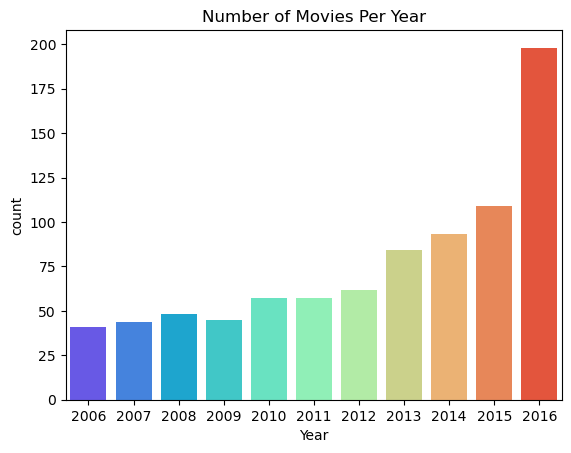

In [59]:
sns.countplot(x='Year',data=df,palette='rainbow')
plt.title("Number of Movies Per Year")

# 15. Find Most Popular Movie Title (Highest Revenue)


In [62]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'title_len'],
      dtype='object')

In [67]:
df[df['Revenue (Millions)'].max()==df['Revenue (Millions)']]['Title']

50    Star Wars: Episode VII - The Force Awakens
Name: Title, dtype: object

# 16. Display Top 10 Highest Rated Movie Titles And its Directors

In [73]:
df_new=df[['Rating','Director','Title']].set_index('Title').copy()
df_new.sort_values(by='Rating',ascending=False).head(10)

,Rating,Director
Title,,
The Dark Knight,9.0,Christopher Nolan
Inception,8.8,Christopher Nolan
Interstellar,8.6,Christopher Nolan
The Intouchables,8.6,Olivier Nakache
Kimi no na wa,8.6,Makoto Shinkai
The Dark Knight Rises,8.5,Christopher Nolan
Taare Zameen Par,8.5,Aamir Khan
Whiplash,8.5,Damien Chazelle
The Departed,8.5,Martin Scorsese


<Axes: xlabel='Title'>

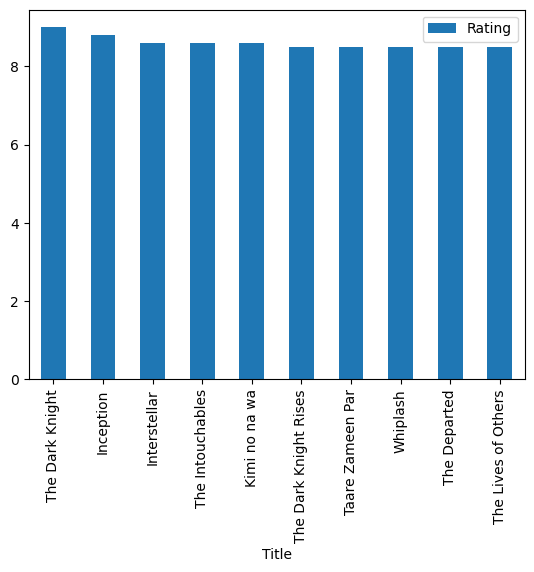

In [120]:
df_new.sort_values(by='Rating',ascending=False).head(10).plot(kind="bar")

# 17. Display Top 10 Highest Revenue Movie Titles

In [75]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'title_len'],
      dtype='object')

In [77]:
df_n=df[['Title','Revenue (Millions)']].set_index('Title').head(10).copy()

In [80]:
df_n.sort_values(by='Revenue (Millions)', ascending=False)

,Revenue (Millions)
Title,
Guardians of the Galaxy,333.13
Suicide Squad,325.02
Sing,270.32
Fantastic Beasts and Where to Find Them,234.02
La La Land,151.06
Split,138.12
Prometheus,126.46
Passengers,100.01
The Great Wall,45.13


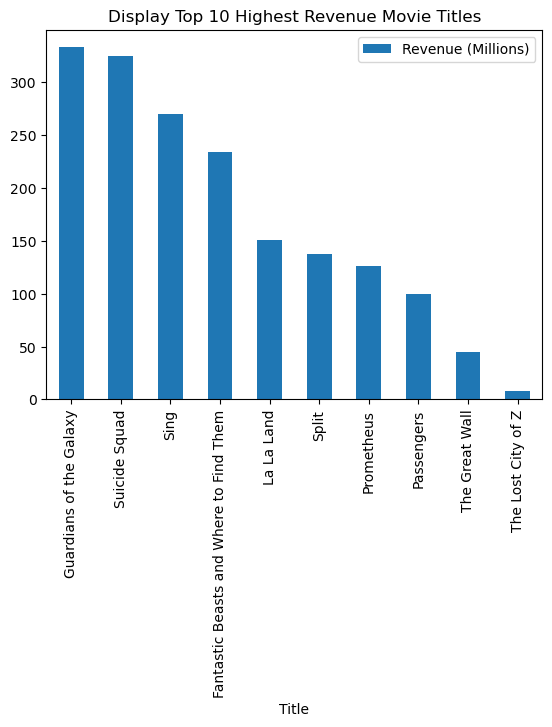

In [82]:
df_n.sort_values(by='Revenue (Millions)', ascending=False).plot(kind="bar")
plt.title("Display Top 10 Highest Revenue Movie Titles")
plt.show()

# 18. Find Average Rating of Movies Year-wise

In [92]:
data1 = df.groupby('Year')['Rating'].mean().sort_values(ascending=False).reset_index()

In [93]:
data1

,Year,Rating
0,2006,7.143902
1,2007,7.140909
2,2011,6.945614
3,2012,6.933871
4,2009,6.911111
5,2010,6.894737
6,2013,6.832143
7,2014,6.822581
8,2008,6.708333
9,2015,6.674312


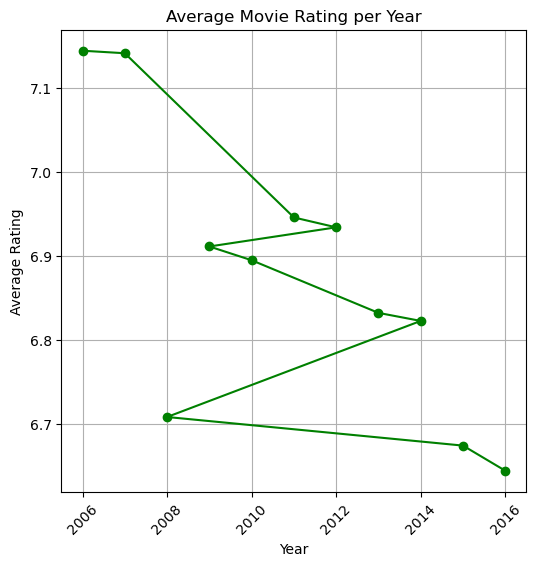

In [99]:
plt.figure(figsize=(6, 6))
plt.plot(data1['Year'], data1['Rating'], marker='o', linestyle='-', color='g')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Movie Rating per Year')
plt.grid(True)
plt.xticks(rotation=45) 
plt.show()

# 19. Does Rating Affect The Revenue?

<Axes: xlabel='Rating', ylabel='Revenue (Millions)'>

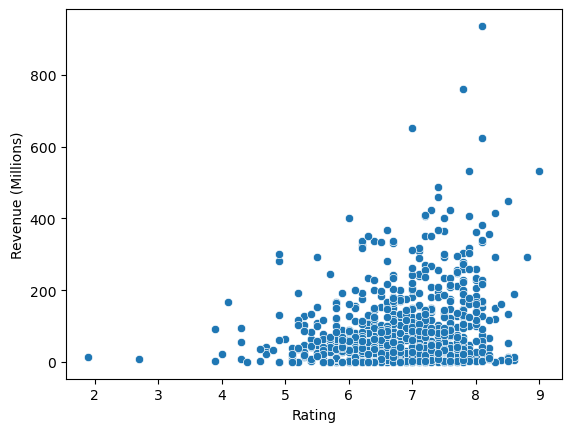

In [100]:
sns.scatterplot(x='Rating',y='Revenue (Millions)',data=df)

## Answer-Yes

# 20. Classify Movies Based on Ratings [Good,Better and Best]

In [101]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'title_len'],
      dtype='object')

In [104]:
df['Rating'].unique()

array([8.1, 7. , 7.3, 7.2, 6.2, 6.1, 8.3, 7.1, 7.5, 7.8, 7.9, 7.7, 6.4,
       6.6, 8.2, 6.7, 8. , 6.5, 5.3, 5.9, 6.3, 5.6, 8.6, 7.6, 6.9, 5.8,
       9. , 7.4, 4.1, 8.5, 6.8, 8.8, 5.4, 6. , 5.7, 8.4, 4.7, 5.2, 5.5,
       3.9, 4.9, 5.1, 4.3, 5. , 4.6, 4. , 1.9, 2.7, 4.4, 4.8])

In [105]:
df_2=df[['Rating','Title']].set_index('Title')

In [108]:
for rating in df_2['Rating']:
    if rating>=0 and rating <=3.5:
        df_2['Classify']='Good'
    elif rating>3.5 and rating <=7:
        df_2['Classify']='Better'
    else:
        df_2['Classify']='Best'   

In [109]:
df_2

,Rating,Classify
Title,,
Guardians of the Galaxy,8.1,Better
Prometheus,7.0,Better
Split,7.3,Better
Sing,7.2,Better
Suicide Squad,6.2,Better
...,...,...
Resident Evil: Afterlife,5.9,Better
Project X,6.7,Better
Hostel: Part II,5.5,Better


# 21. Count Number of Action Movies

In [114]:
df[df['Genre']=='Action'].value_counts()

Rank  Title                 Genre   Description                                 Director        Actors                                                           Year  Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  title_len
581   Kickboxer: Vengeance  Action  A kick boxer is out to avenge his brother.  John Stockwell  Dave Bautista, Alain Moussi, Gina Carano, Jean-Claude Van Damme  2016  90                 4.9     6809   131.56              37.0       20           1
Name: count, dtype: int64

In [115]:
list1=[]
for value in df['Genre']:
    list1.append(value.split(','))

In [118]:
count=0
for value in df['temp']:
    if 'Action' in value:
        count=count+1
print("Total Count is",count)
    

Total Count is 277


## Dataset Overview

- Source: [TMDB 5000 Movie Dataset on Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata)
- Features used: title, genres, keywords, overview, cast, crew
- Preprocessing steps include: handling nulls, merging datasets, cleaning text

## Recommendation Engine

We create a 'tags' feature by combining important columns, apply NLP techniques (e.g., stemming), and compute **cosine similarity** between movie vectors. Given a movie title, we return the top 5 most similar movies.

## Conclusion & Next Steps

- The model provides reasonable content-based recommendations.
- You can improve it using collaborative filtering or hybrid systems.
- Next steps:
  - Use user ratings for collaborative filtering
  - Deploy as a Flask app or streamlit interface